# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,01 January 2013,10.000000,84.500000,0.000000,1015.666667
1,02 January 2013,7.400000,92.000000,2.980000,1017.800000
2,03 January 2013,7.166667,87.000000,4.633333,1018.666667
3,04 January 2013,8.666667,71.333333,1.233333,1017.166667
4,05 January 2013,NaN,86.833333,3.700000,1016.500000


# Missing Values



In [3]:
data["date"] = pd.to_datetime(data["date"], errors="ignore")

#####  Setting Index as date column

In [4]:
data = data.set_index("date")

In [5]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', name='date', length=1462)

### A. Checking For any missing values (Data Preparation)

In [7]:
data.isna().sum()

meantemp         9
humidity         6
wind_speed      10
meanpressure    12
dtype: int64

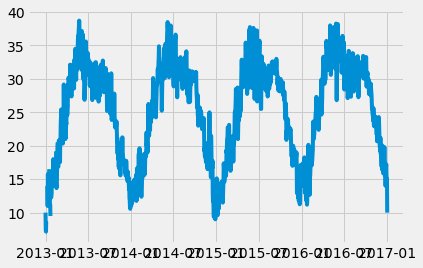

In [8]:
fig, ax=plt.subplots()
ax.plot(data.index, data["meantemp"])

In [9]:
#Feature Scaling
data["meanpressure"] = data["meanpressure"]/100

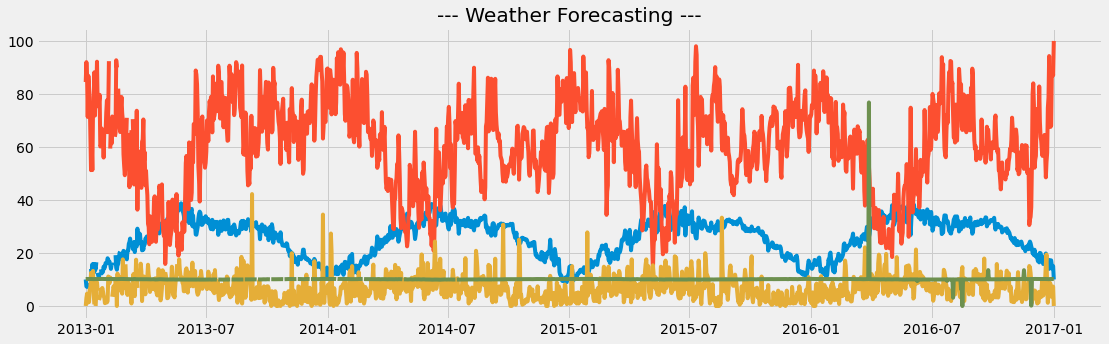

In [10]:
# Checking for Missing values in graphs

plt.rcParams['figure.figsize']=(17,5)
plt.plot(data)
plt.title("--- Weather Forecasting ---")
# plt.legend(["pressure","col2","col3", "col4"])
plt.show()

In [11]:
df2=data.copy()

In [12]:
df2.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,10.156667
2013-01-02,7.400000,92.000000,2.980000,10.178000
2013-01-03,7.166667,87.000000,4.633333,10.186667
2013-01-04,8.666667,71.333333,1.233333,10.171667
2013-01-05,NaN,86.833333,3.700000,10.165000


# B. Imputing Techniques for Time Series Problems (Data Preparation)

### 1. Mean Imputation

In [13]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
imputed_ndarray=si.fit(df2).transform(df2.values)
imputed_df=pd.DataFrame(imputed_ndarray, 
                        columns=df2.columns)
imputed_df.set_index(df2.index)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,10.156667
2013-01-02,7.400000,92.000000,2.980000,10.178000
2013-01-03,7.166667,87.000000,4.633333,10.186667
2013-01-04,8.666667,71.333333,1.233333,10.171667
2013-01-05,25.559617,86.833333,3.700000,10.165000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,10.155652
2016-12-29,15.238095,87.857143,6.000000,10.169048
2016-12-30,14.095238,89.666667,6.266667,10.179048


#####  ColumnTransfer Example: 

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

A = [[7,2,3],[4,np.nan,6],[10,5,np.nan]]

column_trans = ColumnTransformer(
[('imp_col1', SimpleImputer(strategy='mean'), [1]),
 ('imp_col2', SimpleImputer(strategy='constant', fill_value=29), [2])],
remainder='passthrough')

print(column_trans.fit_transform(A)[:, [2,0,1]])


###  2. Last Observed Carried Forward Technique

In [14]:
df2.isna().sum()

meantemp         9
humidity         6
wind_speed      10
meanpressure    12
dtype: int64

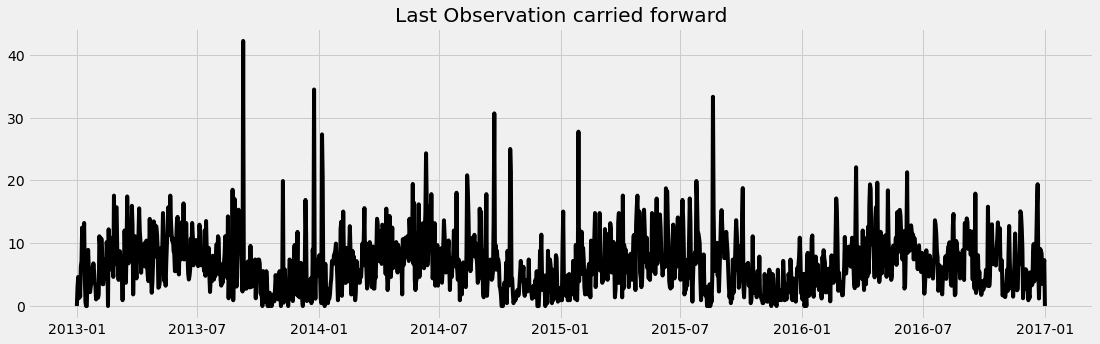

In [15]:
#LOCF
plt.rcParams["figure.figsize"]= (17,5)
df2["wind_speed"]=df2["wind_speed"].bfill()
df2["meantemp"]=df2["meantemp"].bfill()
df2["humidity"]=df2["humidity"].bfill()
plt.plot(df2["wind_speed"], color="black")
plt.title("Last Observation carried forward")
plt.show()

### 3. Linear Interpolation Method

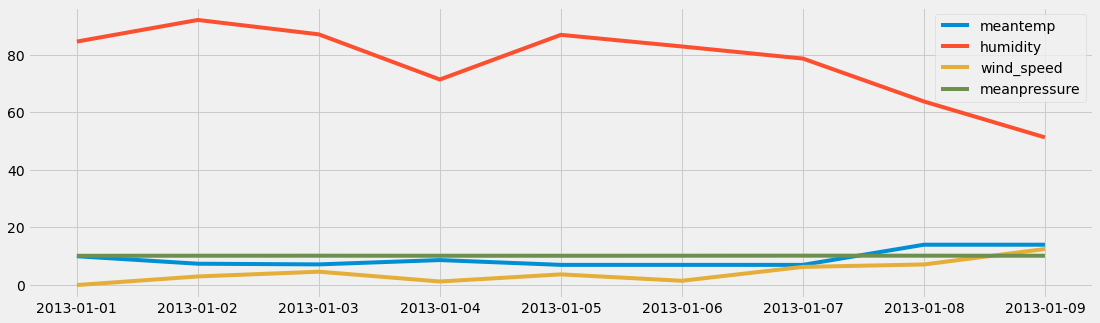

In [16]:
plt.plot(df2[df2.index<"2013-01-10"])
plt.legend(df2.columns)

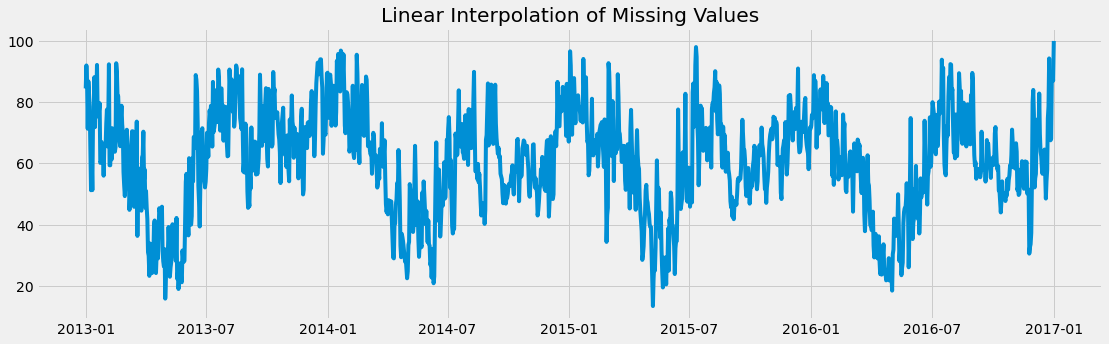

In [17]:
#Graph after Linear Interpolation

plt.rcParams['figure.figsize']=(17,5)
df2["meanpressure"]=df2["meanpressure"].interpolate(method='linear')
plt.plot(df2["humidity"])
plt.title("Linear Interpolation of Missing Values")
plt.show();

In [18]:
df2.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### 4. Seasonal Interpolation

In [19]:
missing_indexes = df2.index[df2["meantemp"].isnull()]
missing_indexes

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [20]:
df2.loc['2013-01-08'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-01-18'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-01-23'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-02-11'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-02-14'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-02-23'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-03-02'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)
df2.loc['2013-03-11'].fillna((df2["2013-01-01":"2013-01-31":7].sum())/df2["2013-01-01":"2013-01-31":7].shape[0], inplace=True)


In [21]:
df2.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

##  Handling Outliers (Data Preparation)

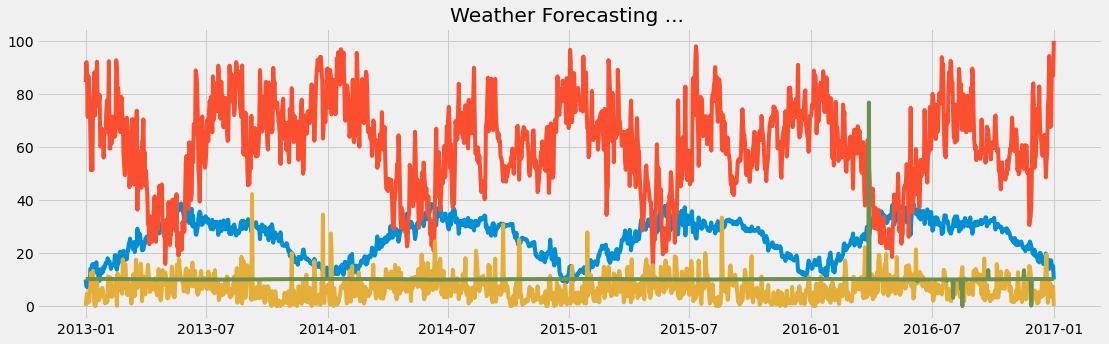

In [22]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(df2)
plt.title("Weather Forecasting ... ")
# plt.legend(["pressure","col2","col3", "col4"])
plt.show()

#### Using Scatter

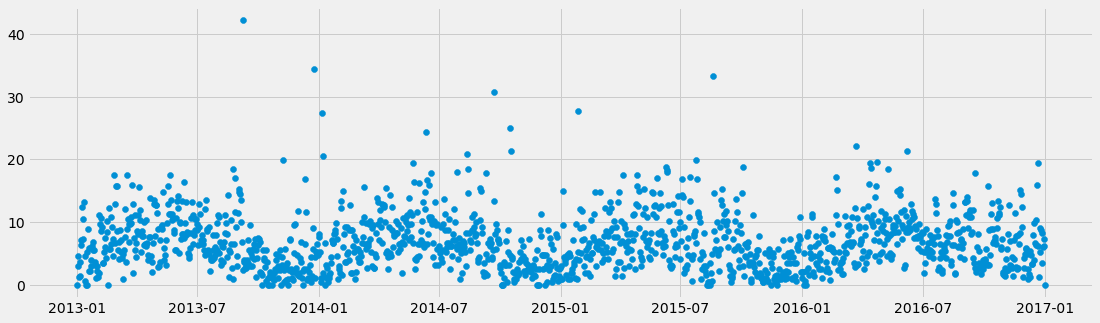

In [23]:
plt.scatter(df2.index,df2["wind_speed"])

#### Using BoxPlot

In [24]:
import seaborn as sb

In [25]:
#df2.drop("meantemp_locf", axis=1, inplace=True)
#df2.drop("meantemp_linear", axis=1, inplace=True)

In [26]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 89.4 KB


<AxesSubplot:xlabel='meanpressure'>

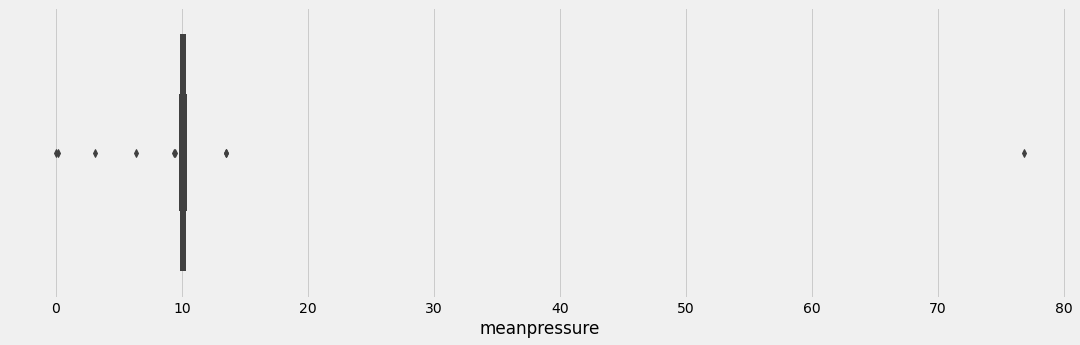

In [27]:
sb.boxplot(df2["meanpressure"])

In [28]:
df2['humidity'].loc[(df2['humidity']<20)]= 22

In [29]:
df2['wind_speed'].loc[(df2['wind_speed']>17)]=17

# C. Data Analysis
## Time-Series Decomposition

Multiplicative Decomposition

* If the magnitude of the seasonal component changes with time, then the series is multiplicative

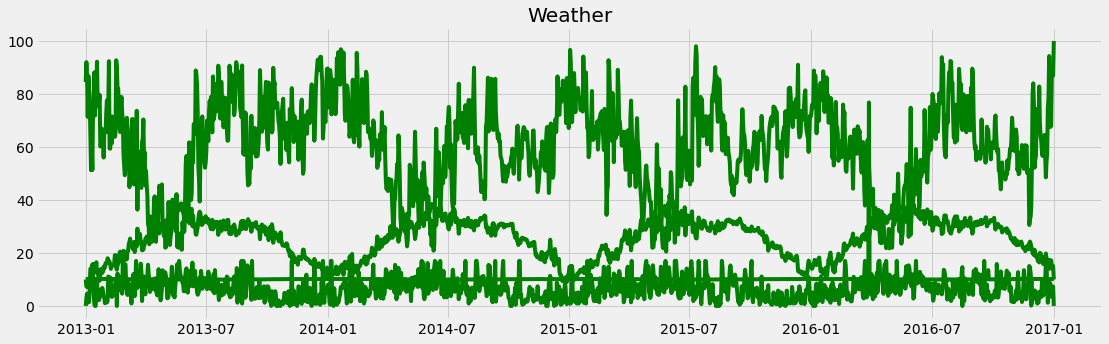

In [30]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(df2, color='green')
plt.title("Weather")
plt.show()

1. Additive Seasonal Decomposition

In [31]:
import statsmodels.api as sm

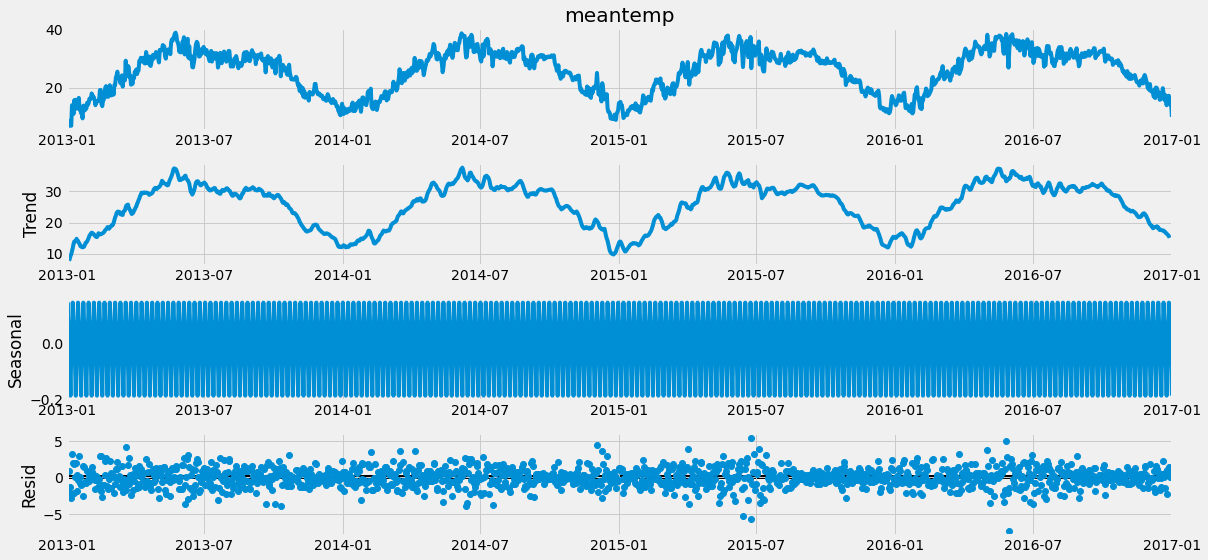

In [32]:
plt.rcParams['figure.figsize']=(17,8)
decomposition = sm.tsa.seasonal_decompose(df2['meantemp'],
                                         model='additive')
decomposition.plot()
plt.show()

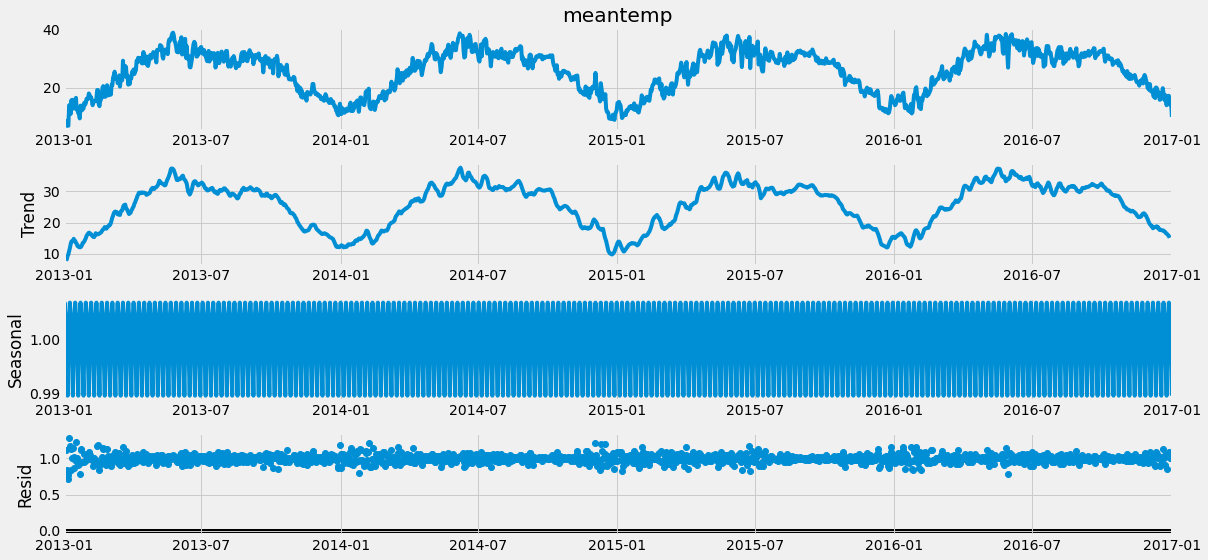

In [33]:
plt.rcParams['figure.figsize']=(17,8)
decomposition = sm.tsa.seasonal_decompose(df2['meantemp'],
                                         model='multiplicative')
decomposition.plot()
plt.show()

# D. Splitting Time Series Data

In [34]:
# Total Count = 1462
# Fist 1000 rows as training data 

In [126]:
train = df2.iloc[:1000:]
test = df2.iloc[1000::]
train.shape, test.shape

((1000, 4), (462, 4))

## E. Basic Forecasting Techniques

###  1. Naive Method

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1100 entries, 2013-01-01 to 2016-01-05
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1100 non-null   float64
 1   humidity      1100 non-null   float64
 2   wind_speed    1100 non-null   float64
 3   meanpressure  1100 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [37]:
y_naive=test.copy()
length_train=len(train)
y_naive["forecasted_naive"]=train["meantemp"][length_train-1]
y_naive

,meantemp,humidity,wind_speed,meanpressure,forecasted_naive
date,,,,,
2016-01-06,17.375000,81.625000,2.312500,10.165000,15.833333
2016-01-07,17.125000,87.000000,0.000000,10.181250,15.833333
2016-01-08,15.500000,83.250000,7.887500,10.172500,15.833333
2016-01-09,15.857143,65.142857,8.471429,10.154286,15.833333
2016-01-10,15.625000,74.375000,2.775000,10.175000,15.833333
...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,10.155652,15.833333
2016-12-29,15.238095,87.857143,6.000000,10.169048,15.833333
2016-12-30,14.095238,89.666667,6.266667,10.179048,15.833333


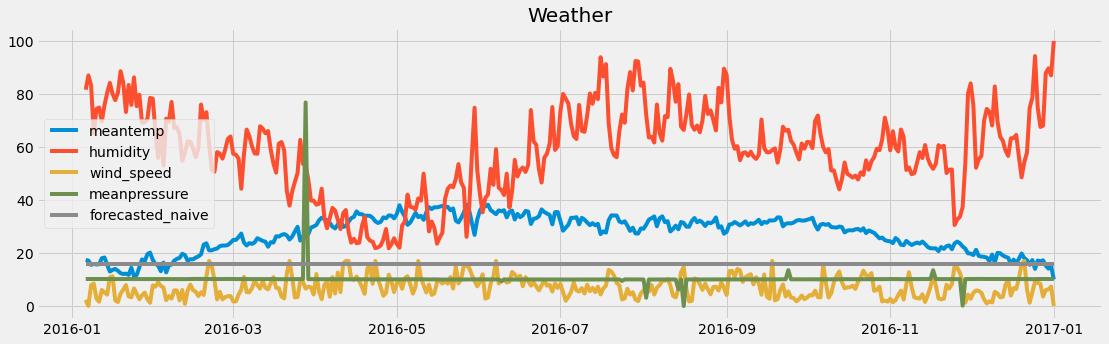

In [38]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(y_naive)
plt.title("Weather")
plt.legend(y_naive.columns)
plt.show()

### 2. Simple Average Method

In [39]:
y_avg = test.copy()
y_avg["forecasted_avg"] = train["meantemp"].mean()


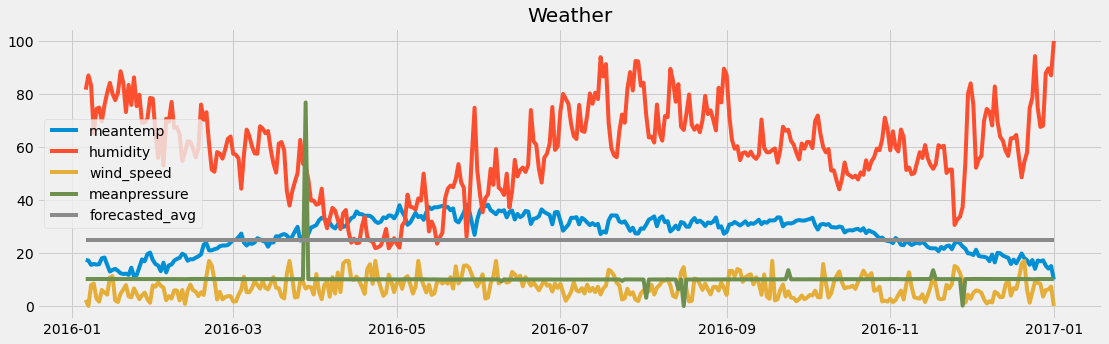

In [40]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(y_avg)
plt.title("Weather")
plt.legend(y_avg.columns)
plt.show()

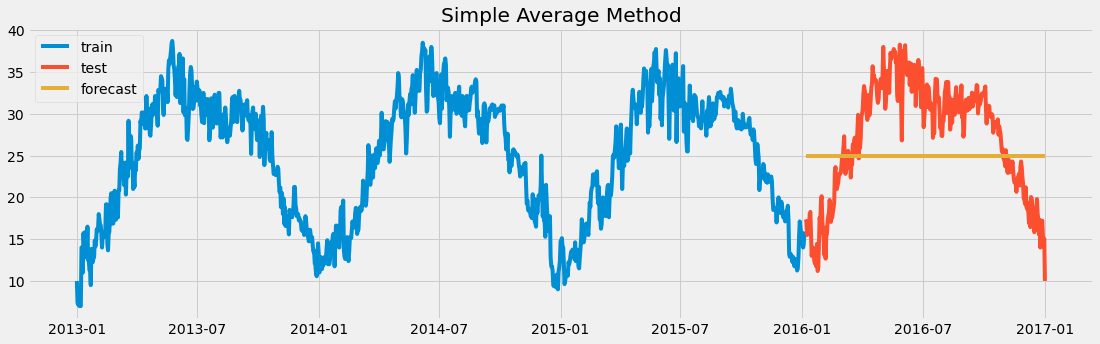

In [41]:
#Train vs Test vs Forecasted Data
plt.plot(train["meantemp"], label="train")
plt.plot(test["meantemp"], label="test")
plt.plot(y_avg["forecasted_avg"], label="forecast")
plt.legend()
plt.title("Simple Average Method")
plt.show()

### 3. Simple Moving Average Method

In [42]:
len(train), len(test)

(1100, 362)

In [43]:
y_moving = df2.copy()
window=9
y_moving["moving_average_forecast"] = df2["meantemp"].rolling(window).mean()
#y_moving["moving_average_forecast"][len(train):] = y_moving["moving_average_forecast"][len(train)-1]
y_moving["moving_average_forecast"][:len(train):]=None


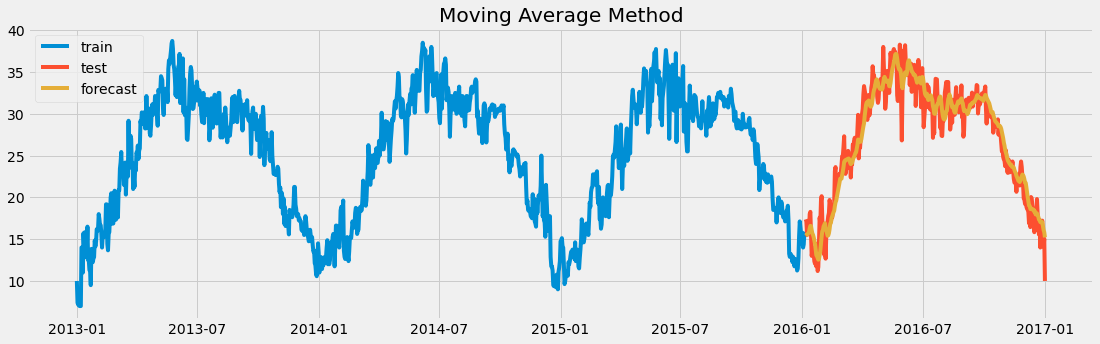

In [44]:
#Train vs Test vs Forecasted Data

plt.plot(train["meantemp"], label="train")
plt.plot(test["meantemp"], label="test")
plt.plot(y_moving["moving_average_forecast"], label="forecast")
plt.legend()
plt.title("Moving Average Method")
plt.show()

### 4. Simple Exponential Smoothing



In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model=SimpleExpSmoothing(train["meantemp"])
model_fit = model.fit(smoothing_level=0.2)
#model_fit.params
y_exp = test.copy()
y_exp["expo_forecast"] = model_fit.forecast(len(test))

C:\Users\Naundla\miniconda3\envs\climate_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [46]:
y_exp["expo_forecast"].mean()

14.966637947274728

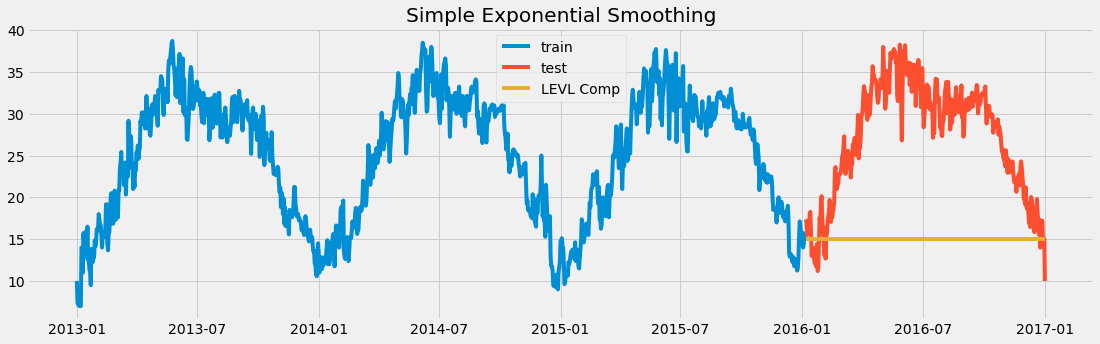

In [47]:
#Train vs Test vs Forecasted Data

plt.plot(train["meantemp"], label="train")
plt.plot(test["meantemp"], label="test")
plt.plot(y_exp["expo_forecast"], label="LEVL Comp")
plt.legend()
plt.title("Simple Exponential Smoothing")
plt.show()

### 5. Holt Exponential Smoothing

y(t+1) = l(t) + b(t)

'y = Forecast 

'l = Level Component

'b = trend Component

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train["meantemp"], seasonal_periods=5, trend='multiplicative')
model_fit=model.fit(smoothing_level=0.2, smoothing_slope=0.4)
model_fit.params
y_holtexpo = test.copy()
y_holtexpo['forecast'] = model_fit.forecast(len(test))

C:\Users\Naundla\miniconda3\envs\climate_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


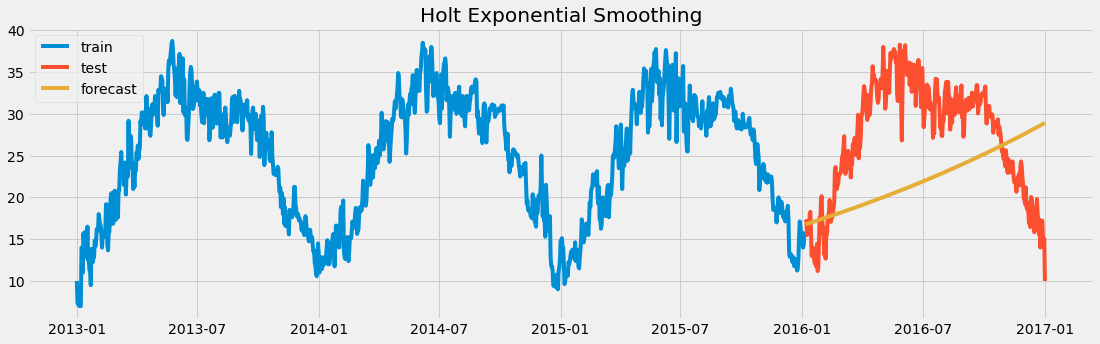

In [49]:
#Train vs Test vs Forecasted Data

plt.plot(train["meantemp"], label="train")
plt.plot(test["meantemp"], label="test")
plt.plot(y_holtexpo["forecast"], label="forecast")
plt.legend()
plt.title("Holt Exponential Smoothing")
plt.show()

### 6. Holt's Winter Exponential Smoothing

Captures All level, trend and seasonality

smoothing_level, smoothing_scope, smoothing_seasonal ==> will have to figure correct values by looping thru possible combinations and then fit our model .. 

In [50]:
model=ExponentialSmoothing(train["meantemp"],
                          seasonal_periods=12, 
                          trend="additive",
                          seasonal="additive")
model_fit=model.fit(smoothing_level=0.2, 
                   smoothing_slope=0.05,
                   smoothing_seasonal=0.005)
model_fit.params
y_holtwinter=test.copy()
y_holtwinter["forecast"]= model_fit.forecast(36)

C:\Users\Naundla\miniconda3\envs\climate_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


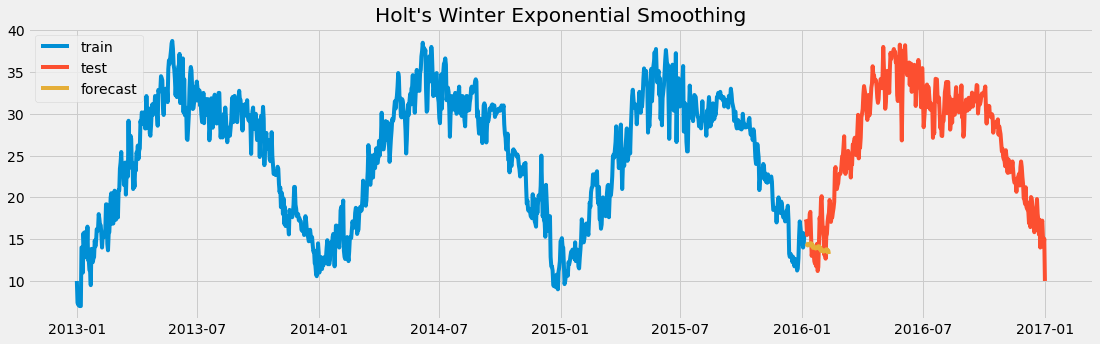

In [51]:
#Train vs Test vs Forecasted Data

plt.plot(train["meantemp"], label="train")
plt.plot(test["meantemp"], label="test")
plt.plot(y_holtwinter["forecast"], label="forecast")
plt.legend()
plt.title("Holt's Winter Exponential Smoothing")
plt.show()

# F. Data Pre Processing

### 1.a. Checking For Stationarity

####  ADFT

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [52]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df2['meantemp'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -1.9845938123673983
n_lags: 0.29336876052924626
p-value: 0.29336876052924626
Critial Values:
   1%, -3.4348647527922824
Critial Values:
   5%, -2.863533960720434
Critial Values:
   10%, -2.567831568508802


In [53]:
from statsmodels.tsa.stattools import kpss

result = kpss(df2['meantemp'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 0.1869777771880618
p-value: 0.1
num lags: 25
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Naundla\miniconda3\envs\climate_analysis\lib\site-packages\statsmodels\tsa\stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


###### "Since p-value is greater than 0.05, this time series is stationary"

### 1.b Converting Non-Stationary to Stationary


#####  1) Box Cox Transformation

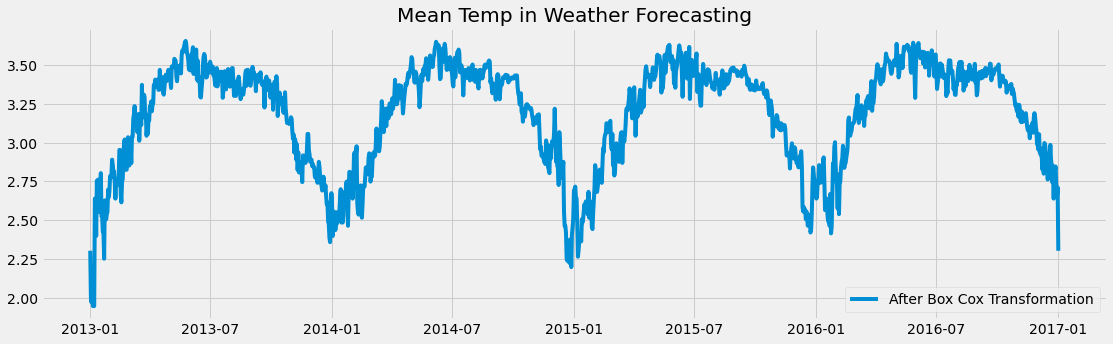

In [54]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(df2['meantemp'],
                               lmbda=0),
                        index=df2.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend()
plt.title("Mean Temp in Weather Forecasting")
plt.show()

##### 2) Differencing Technique

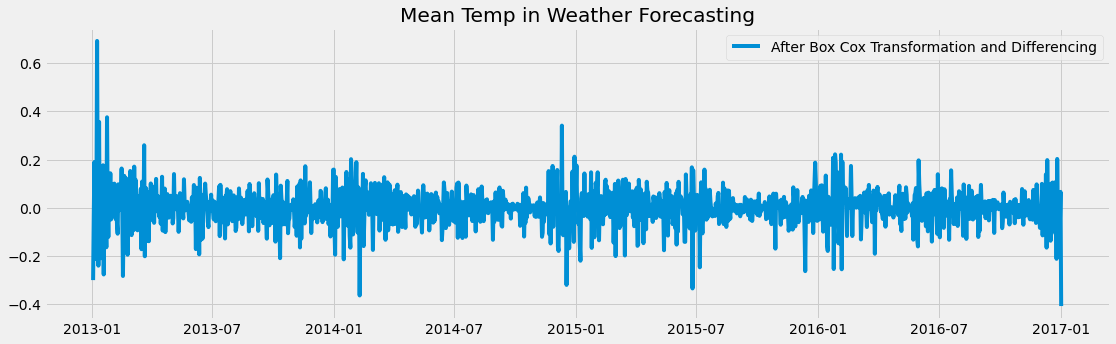

In [55]:
data_boxcox_difference= pd.Series(data_boxcox - data_boxcox.shift(), 
                                  index=df2.index)
data_boxcox_difference.dropna(inplace=True)
plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Mean Temp in Weather Forecasting")
plt.show()

Test ADF and KPSS test after transforming to Stationary

In [56]:
def print_adf_kpss_stats(data_boxcox_difference):
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import kpss
    result = adfuller(data_boxcox_difference, autolag='AIC')
    print(f'--------ADF Statistic ----------: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}') ;
    print("\n\n --------- KPSS -------")
    result = kpss(data_boxcox_difference)
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'num lags: {result[2]}')
    print('Critial Values:')
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')  

In [57]:
print_adf_kpss_stats(data_boxcox_difference)

--------ADF Statistic ----------: -20.888618215749542
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.43484922137066
Critial Values:
   5%, -2.8635271063560412
Critial Values:
   10%, -2.5678279184465946


 --------- KPSS -------
KPSS Statistic: 0.2885702214043918
p-value: 0.1
num lags: 33
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Naundla\miniconda3\envs\climate_analysis\lib\site-packages\statsmodels\tsa\stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### 3. Auto Correlation and Partial Correlation

Auto Correlation Function

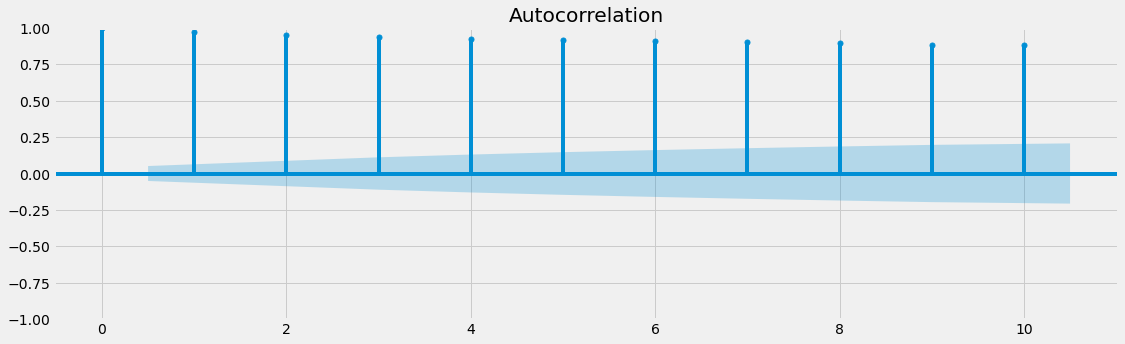

In [88]:
# Loading and Plotting ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2["meantemp"], ax=plt.gca(), lags=10)
plt.show()

Partial Correlation

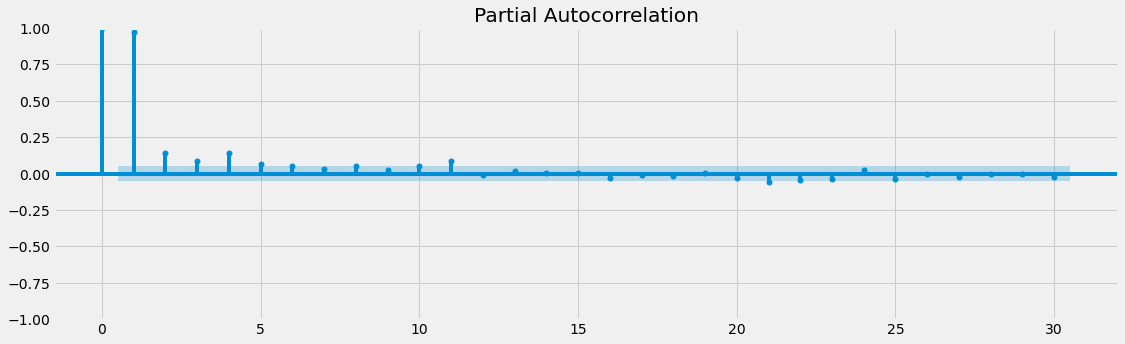

In [89]:
# Loading pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df2["meantemp"], ax=plt.gca(), lags=30)
plt.show()

# G. Model 

In [60]:
len_train=len(train)
len_test=len(test)

In [61]:
len(data_boxcox), len(train), len(df2)

(1462, 1100, 1462)

In [62]:
train_data_boxcox = data_boxcox[:len_train]
test_data_boxcox = data_boxcox[len_train:]
train_data_boxcox_diff = data_boxcox_difference[:len_train-1]
test_data_boxcox_diff = data_boxcox_difference[len_train-1:]

## 1. Simple Auto Regressive Model

In [63]:
import warnings 
warnings.filterwarnings('ignore')

Generalizing the things which are common accross Time Series Models

In [150]:
def get_ar_model(train_data_boxcox_diff, model_name, order_value, seasonal_value=None):
    if(seasonal_value == None):
        model_ar = model_name(train_data_boxcox_diff, order=order_value)
    else:
        model_ar = model_name(train_data_boxcox_diff, order=order_value, seasonal_order=seasonal_value)
    model_fit = model_ar.fit()
    #print(model_fit.params)
    return model_fit

#Restoring Original Data => Since we have transformed using BoxCox Method for AR model to work
def restore_org_data(data_boxcox_difference,model_fit,data_boxcox=None):
    y_ar_new = data_boxcox_difference.copy()
    y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())

    y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
    if(data_boxcox!=None):
        y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0])
    y_ar_new['ar_forecast'] = (y_ar_new['ar_forecast_boxcox'])
    return y_ar_new;

def plot_results(train, test, y_ar_new, forecast_label,plot_title):
    plt.figure(figsize=(17,8))
    plt.plot(train['meantemp'], label = 'Train')
    plt.plot(test['meantemp'], label = 'Test')
    #plt.plot(y_ar_new['ar_forecast'][len(train):], label = forecast_label)
    plt.plot(y_ar_new['ar_forecast'], label = forecast_label)
    plt.legend()
    plt.title(plot_title)
    plt.show();

In [66]:
#y_ar_new[10],y_ar_new[11],y_ar_new[110], np.median(y_ar_new['ar_forecast'])
#len(y_ar_new), len(test)


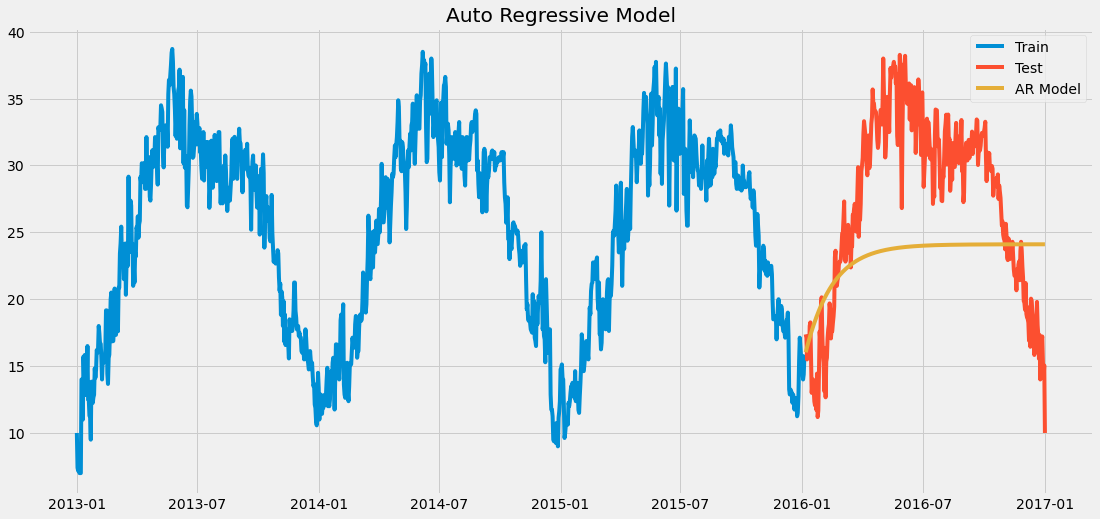

In [118]:
from statsmodels.tsa.arima.model import ARIMA
model_fit=get_ar_model(train["meantemp"], model_name=ARIMA, 
                          order_value=(1,0,0))
#y_ar_new=restore_org_data(df2["meantemp"],model_fit)
y_ar_new=df2.copy();
y_ar_new["ar_forecast"]=model_fit.predict(test["meantemp"].index.min(), test["meantemp"].index.max())
plot_results(train,test,y_ar_new, forecast_label='AR Model', plot_title='Auto Regressive Model')

## 2. Moving Average Model

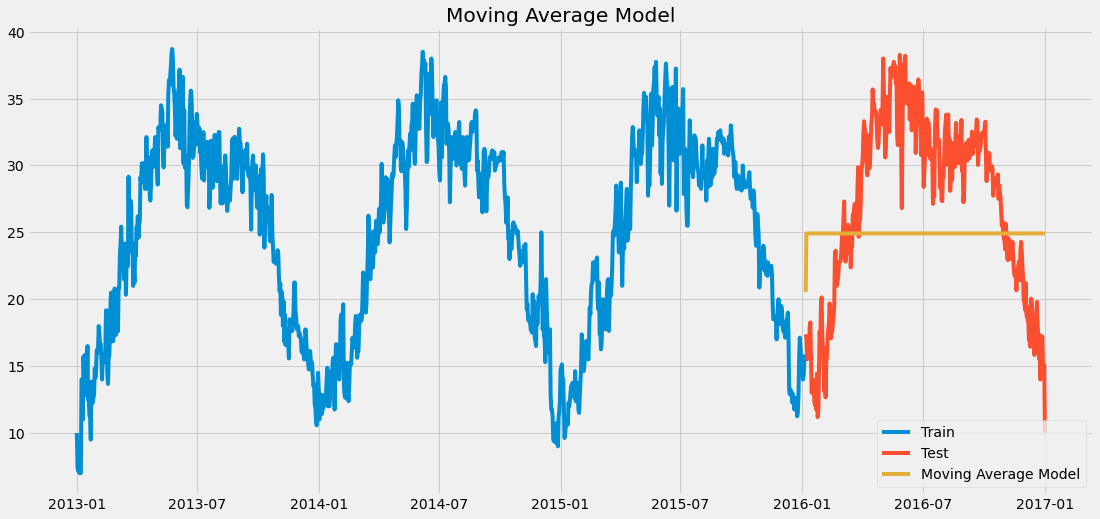

In [119]:
from statsmodels.tsa.arima.model import ARIMA
model_fit=get_ar_model(train["meantemp"], model_name=ARIMA, order_value=(0,0,1))
#y_ma_new=restore_org_data(data_boxcox_difference,model_fit,data_boxcox)
y_ma_new=df2.copy();
y_ma_new["ar_forecast"]=model_fit.predict(test["meantemp"].index.min(), test["meantemp"].index.max())
plot_results(train,test,y_ma_new, forecast_label='Moving Average Model', plot_title='Moving Average Model')

## 3. ARMA Model

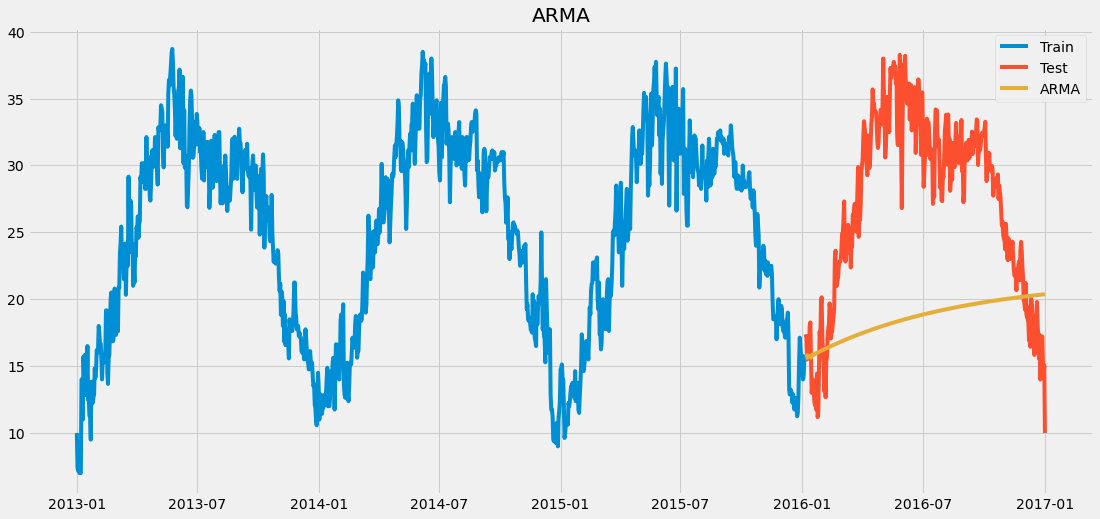

In [120]:
from statsmodels.tsa.arima.model import ARIMA
model_fit=get_ar_model(train["meantemp"], model_name=ARIMA, order_value=(12,0,2), seasonal_value=None)
#y_ma_new=restore_org_data(data_boxcox_difference,model_fit,data_boxcox)
y_ma_new=df2.copy();
y_ma_new["ar_forecast"]=model_fit.predict(test["meantemp"].index.min(), test["meantemp"].index.max())
plot_results(train,test,y_ma_new, forecast_label='ARMA', plot_title='ARMA')

## 4. ARIMA Model

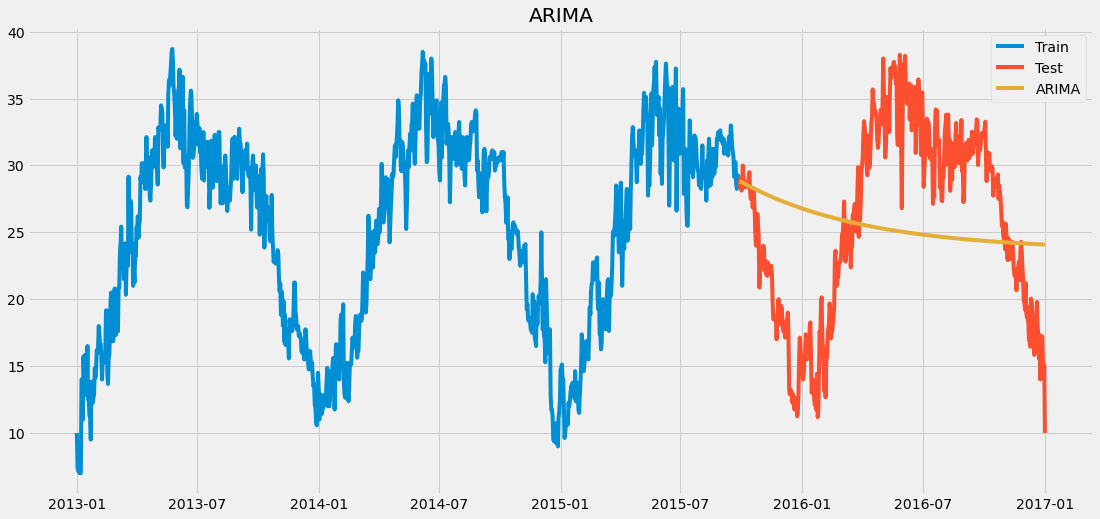

In [135]:
from statsmodels.tsa.arima.model import ARIMA
model_fit=get_ar_model(train["meantemp"], model_name=ARIMA, order_value=(1,0,3))
#y_ma_new=restore_org_data(data_boxcox_difference,model_fit,data_boxcox)
y_ma_new=df2.copy();
y_ma_new["ar_forecast"]=model_fit.predict(test["meantemp"].index.min(), test["meantemp"].index.max())
plot_results(train,test,y_ma_new, forecast_label='ARIMA', plot_title='ARIMA')

## 5. SARIMA Model

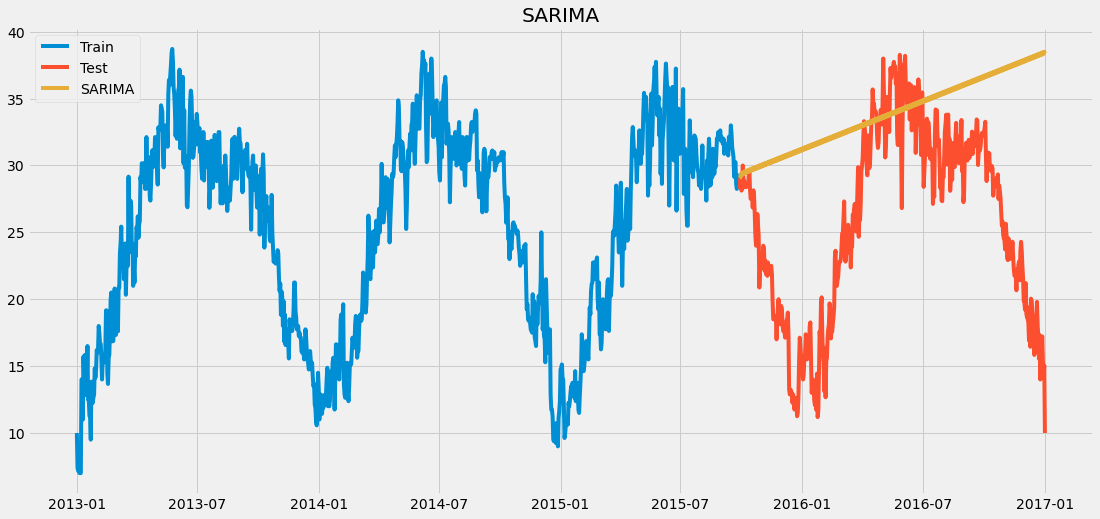

In [151]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_fit=get_ar_model(train["meantemp"], model_name=SARIMAX, order_value=(1,1,1), seasonal_value=(4,1,1,2))
y_ma_new=df2.copy();
y_ma_new["ar_forecast"]=model_fit.predict(test["meantemp"].index.min(), test["meantemp"].index.max())
plot_results(train,test,y_ma_new, forecast_label='SARIMA', plot_title='SARIMA');

  ## 6. ARIMAX Model

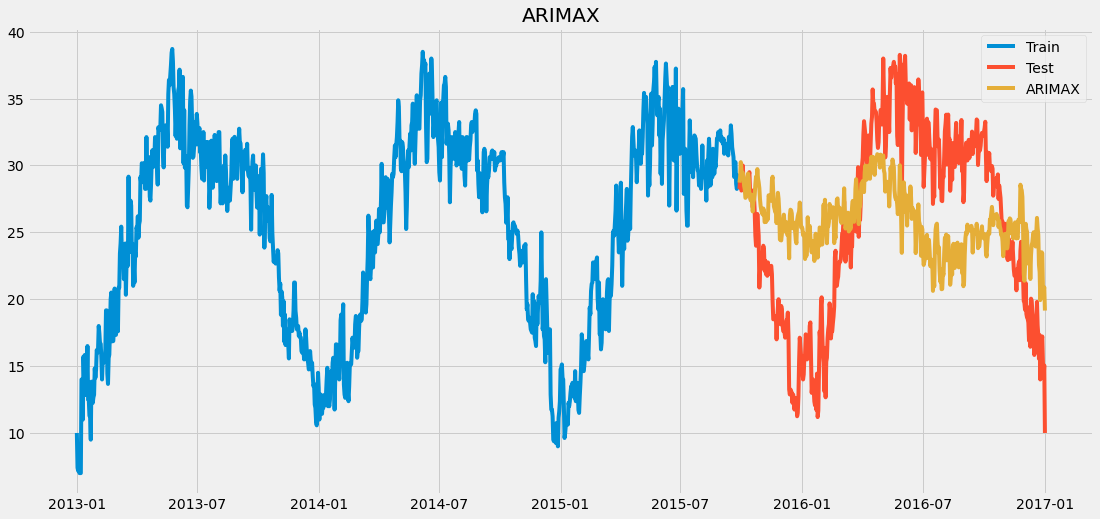

In [142]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['meantemp'], order=(1,0,3), exog= train['humidity'])
model_fit = model.fit()
y_arimax = df2.copy()
y_arimax['ar_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                test['meantemp'].index.max(),
                                                exog= test['humidity'])

plot_results(train,test,y_arimax, forecast_label='ARIMAX', plot_title='ARIMAX')

  ## 6. ARIMAX Model

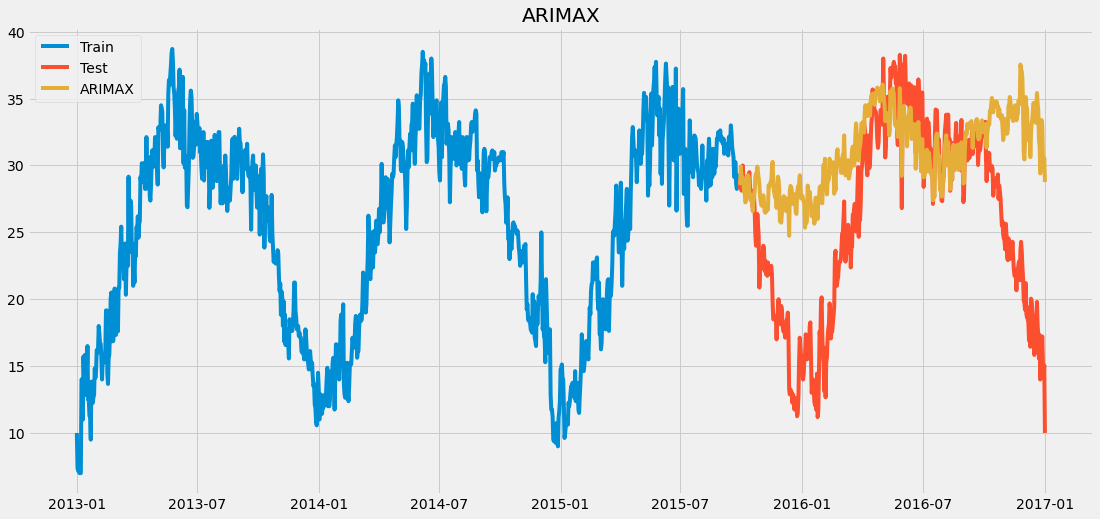

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['meantemp'], order=(7,0,3), seasonal_order=(2,1,1,12), exog= train['humidity'])
model_fit = model.fit()
y_arimax = df2.copy()
y_arimax['ar_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                test['meantemp'].index.max(),
                                                exog= test['humidity'])

plot_results(train,test,y_arimax, forecast_label='ARIMAX', plot_title='ARIMAX')